In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet('/home/walml/repos/zoobot-predictions/data/desi_wds/representations/convnext_nano_evo/representations_pca_100_debug.parquet')

In [4]:
df

,id_str,hdf5_loc,feat_pca_0,feat_pca_1,feat_pca_2,feat_pca_3,feat_pca_4,feat_pca_5,feat_pca_6,feat_pca_7,...,feat_pca_90,feat_pca_91,feat_pca_92,feat_pca_93,feat_pca_94,feat_pca_95,feat_pca_96,feat_pca_97,feat_pca_98,feat_pca_99
0,303240_2499,grouped.hdf5,4.021870,3.512972,0.257407,-7.414328,-3.421774,-1.798621,-4.679226,0.038371,...,0.282981,0.168986,-0.339287,-0.053833,-0.178114,0.175917,0.389291,-0.067015,0.022147,-0.089216
1,541141_4028,grouped.hdf5,1.950232,-0.133307,5.615565,6.526586,-1.070808,1.277208,1.529999,-5.278116,...,0.115495,-0.125626,0.149001,0.234359,0.310283,0.039143,0.133108,-0.046930,0.145694,0.027689
2,342751_521,grouped.hdf5,-3.876018,-6.326128,3.277180,0.756164,2.932319,-0.003512,0.812937,-1.404981,...,-0.040640,0.075941,-0.080053,-0.013049,0.063625,0.050865,-0.049215,0.072941,-0.045780,-0.058661
3,76349_1685,grouped.hdf5,3.875354,-3.849003,3.699482,0.351111,1.507269,-0.328184,0.893476,-1.516716,...,0.093448,0.083432,-0.088098,0.134347,-0.023483,0.040351,-0.108403,-0.106766,0.025973,-0.134086
4,576940_2831,grouped.hdf5,-9.901690,-7.111586,-1.975675,0.305028,-3.311888,-0.880009,0.631637,0.706256,...,-0.208583,0.108191,-0.098767,0.192905,0.004138,0.018928,0.233292,0.120384,0.042043,-0.084185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614395,293777_3629,grouped.hdf5,5.701541,-1.236331,2.796425,0.309099,1.831991,1.096678,1.450155,-0.540895,...,0.104274,-0.166615,0.079101,0.022977,0.021858,0.000388,-0.081859,-0.096321,-0.087883,-0.161418
614396,578582_560,grouped.hdf5,-0.014969,5.874651,-4.787459,10.412855,3.959543,-15.547364,-2.151362,2.179450,...,-0.158726,-0.473483,-0.490177,-0.014565,-0.167572,0.255800,-0.061927,-0.258047,0.266606,0.059424
614397,660270_1074,grouped.hdf5,-6.374455,-1.444767,0.629435,-1.856222,3.622310,-0.250987,0.148492,1.630672,...,-0.133602,-0.105681,-0.154102,0.038204,0.208065,0.248602,-0.097517,0.206719,-0.052498,-0.170553
614398,561629_132,grouped.hdf5,8.296963,-3.837130,0.507084,-1.235394,2.273723,-0.625556,1.852383,0.596842,...,-0.144528,-0.080902,0.063910,-0.062602,-0.000431,0.127593,-0.041227,0.132905,-0.047803,-0.085066


In [5]:
MORPH_LOC = '~/Dropbox (The University of Manchester)/desi/catalogs/gz_desi_deep_learning_catalog_friendly.parquet'
CATALOG_LOC = '~/Dropbox (The University of Manchester)/desi/catalogs/master_all_file_index_passes_file_checks.parquet'

In [8]:
morph = pd.read_parquet(MORPH_LOC, columns=['dr8_id', 'smooth-or-featured_smooth_fraction', 'smooth-or-featured_featured-or-disk_fraction'])

In [9]:
catalog = pd.read_parquet(CATALOG_LOC, columns=['dr8_id', 'ra', 'dec'])

In [10]:
df['dr8_id'] = df['id_str']
df = pd.merge(df, catalog, how='inner', validate='one_to_one', on='dr8_id')
print(len(df))

614400


In [11]:
df['dr8_id'] = df['id_str']
df = pd.merge(df, morph, how='inner', validate='one_to_one', on='dr8_id')
print(len(df))

614400


In [12]:
df.sample(10)

,id_str,hdf5_loc,feat_pca_0,feat_pca_1,feat_pca_2,feat_pca_3,feat_pca_4,feat_pca_5,feat_pca_6,feat_pca_7,...,feat_pca_95,feat_pca_96,feat_pca_97,feat_pca_98,feat_pca_99,dr8_id,ra,dec,smooth-or-featured_smooth_fraction,smooth-or-featured_featured-or-disk_fraction
43671,377701_3456,grouped.hdf5,12.199385,-0.918496,-5.506918,-0.956110,1.318877,2.273151,0.058177,0.943466,...,0.085520,0.045677,-0.003589,0.013722,-0.136347,377701_3456,343.842643,8.067034,0.834775,0.061957
88093,487418_2794,grouped.hdf5,-11.323588,-1.351252,-3.895668,-2.710400,0.863286,0.377377,1.785287,4.079638,...,0.147148,0.003283,-0.101039,0.053837,0.016448,487418_2794,160.714417,28.276461,0.521487,0.416888
573806,535870_118,grouped.hdf5,-2.425337,-2.010028,5.367088,2.025935,-0.704939,0.564688,-1.303900,-1.811871,...,0.121820,0.096971,0.126702,0.005852,0.115249,535870_118,233.206972,38.131680,0.840759,0.076239
443237,427704_27,grouped.hdf5,12.567401,-4.881349,-4.170471,-2.440510,0.748813,-0.858164,2.087336,-0.375198,...,-0.079868,0.009193,0.069584,-0.015796,-0.156992,427704_27,189.891626,16.885665,0.860720,0.038419
173456,281768_2676,grouped.hdf5,4.455273,7.416459,-0.969351,6.968349,-1.647507,7.233415,-0.062162,-4.765471,...,-0.294167,0.191343,0.245227,-0.016361,0.338123,281768_2676,53.225184,-8.500707,0.771900,0.128268
315983,544903_1914,grouped.hdf5,9.870223,-4.985498,-0.569542,-1.051949,0.751614,-0.935819,1.536496,-0.986846,...,-0.006569,-0.093853,0.109720,-0.075112,0.055998,544903_1914,263.842319,40.225372,0.857971,0.041151
556026,383521_1150,grouped.hdf5,-2.243843,3.245265,-0.965130,-3.934512,-2.612867,-3.438917,-0.041399,0.089247,...,0.045944,-0.119420,-0.244523,0.271732,-0.607909,383521_1150,14.107737,9.184310,0.572180,0.320094
364429,144713_4592,grouped.hdf5,3.728349,0.655990,2.504793,4.342296,0.234993,1.243521,0.616266,-2.247469,...,0.049593,0.040980,-0.087727,0.263026,-0.068832,144713_4592,64.315596,-34.230261,0.794096,0.061014
320504,588736_1165,grouped.hdf5,8.160583,1.467777,-1.465955,-0.717078,-4.696115,1.180156,-0.165019,-0.961401,...,-0.020373,-0.158195,-0.339424,0.029059,-0.112961,588736_1165,99.903383,51.180852,0.856128,0.059853
600116,286551_3083,grouped.hdf5,9.739686,0.597705,-3.198645,1.661962,0.709218,2.972318,0.638993,-0.322368,...,0.081946,-0.104141,0.006144,0.057096,0.139539,286551_3083,179.831667,-7.722904,0.834983,0.050177


(array([ 1741.,  2559.,  2847.,  3296.,  4465.,  5507.,  5238.,  4478.,
         4028.,  3733.,  3643.,  3490.,  3359.,  3468.,  3571.,  3425.,
         3605.,  3799.,  3836.,  4021.,  4205.,  4249.,  4441.,  4626.,
         4815.,  5101.,  5402.,  5795.,  5934.,  6359.,  6805.,  7424.,
         7954.,  8897.,  9776., 10977., 12581., 14163., 16624., 19161.,
        22488., 26742., 32937., 42288., 56937., 72491., 61359., 39445.,
        18403.,  1912.]),
 array([0.0150549 , 0.03316236, 0.05126981, 0.06937727, 0.08748472,
        0.10559218, 0.12369964, 0.14180709, 0.15991455, 0.178022  ,
        0.19612946, 0.21423692, 0.23234437, 0.25045183, 0.26855928,
        0.28666675, 0.30477419, 0.32288164, 0.34098911, 0.35909656,
        0.377204  , 0.39531147, 0.41341892, 0.43152639, 0.44963384,
        0.46774128, 0.48584875, 0.5039562 , 0.52206367, 0.54017109,
        0.55827856, 0.57638603, 0.59449351, 0.61260092, 0.6307084 ,
        0.64881587, 0.66692328, 0.68503076, 0.70313823, 0.72124565

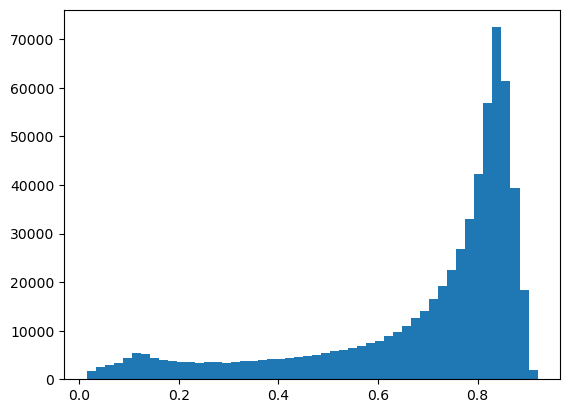

In [18]:
plt.hist(df['smooth-or-featured_smooth_fraction'], bins=50)

In [22]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

df_s = df.sample(10000)

X = df_s[[col for col in df_s if col.startswith('feat_pca_')][:20]].values
y = df_s['smooth-or-featured_smooth_fraction'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model = GradientBoostingRegressor()
model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)



/home/walml/miniforge3/envs/zoobot39_dev/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9584488404356782

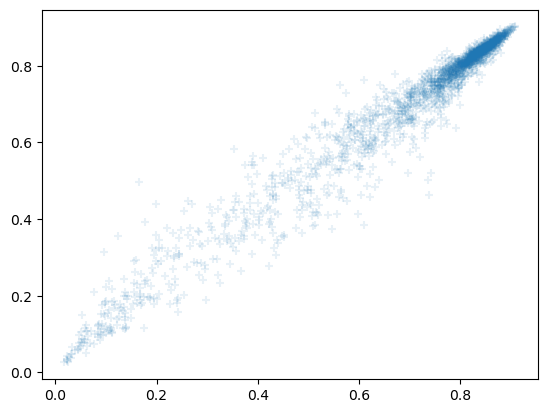

In [24]:
y_test_pred = model.predict(X_test)

plt.scatter(y_test, y_test_pred, marker='+', alpha=.1)
